<a href="https://colab.research.google.com/github/nayaras/IA/blob/master/regressao_logistica_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logística (multinomial)

---
Instituto Federal do Norte de Minas Gerais Campus Montes Claros <br/>

Disciplina: Inteligência Artificial <br/>
Curso: Ciência da Computação  <br/>
Professora: Luciana Balieiro Cosme  <br/>
Desenvolvido por: Eike Stálei, Marianna Leandra M. Silva, Nayara Thaiza P. Soares 


---

A regressão logística é usada em problemas de classificação binária ou multiclasses com os quais o objetivo é separar previsões em classes distintas com base em um limite de probabilidade.

Base de dados: https://archive.ics.uci.edu/ml/datasets/wine



In [0]:
#importações
import numpy as np  
import pandas as pd  
import random
import math
import operator
from numpy import genfromtxt
from random import randrange
#dados
from sklearn import datasets
from sklearn.datasets import load_boston
#plot
import matplotlib.pyplot as plt

#regressão logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV

In [85]:
#importando a base
from sklearn.datasets import load_wine
wine = load_wine()
wine.keys()

print(wine.DESCR)

classes = wine.target


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [86]:
#classes dos vinhos
#3 cultivos diferentes
classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [87]:
import pandas

#adicionando o target na base de dados

dataset = pandas.DataFrame(wine.data) 
dataset = dataset.astype('float64') # converte para float
dataset.columns = wine.feature_names

dataset['classes'] = classes

dataset.head(10)



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,classes
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [0]:
X = dataset
y = dataset['classes'].values

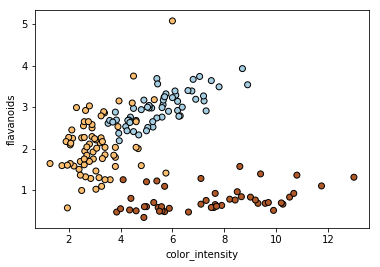

In [89]:
ind1 = 9
ind2 = 6
#for ind1 in range(0, 11):
    #for ind2 in range(1, 12):
plt.scatter(X.iloc[:, ind1], X.iloc[:, ind2], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(dataset.columns.values[ind1])
plt.ylabel(dataset.columns.values[ind2]) 

#plt.xticks(())
#plt.yticks(())

plt.show()

In [90]:
#misturando os dados
print(len(dataset))
perm = np.random.permutation(len(dataset))
dataset = dataset.loc[perm]
dataset.head()
print(len(dataset))


178
178


In [91]:
#quantidade de dados em cada classe
class_0 = dataset[dataset['classes'] == 0]['classes'].index.tolist()
class_1 = dataset[dataset['classes'] == 1]['classes'].index.tolist()
class_2 = dataset[dataset['classes'] == 2]['classes'].index.tolist()

print(len(class_0))
print(len(class_1))
print(len(class_2))


59
71
48


In [0]:
X = np.c_[X.iloc[:, ind1], X.iloc[:, ind2]]
x_train, x_test = X[perm][58:], X[perm][:58]
y_train, y_test = y[perm][58:], y[perm][:58]


In [93]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((120, 2), (120,), (58, 2), (58,))

In [0]:
#chamando a função de regressão logistica do sklearn
log_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial')

In [95]:
#log_reg.fit(X_boston, y)
#treinando os dados
log_reg.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#calculando o y predito
y_pred = log_reg.predict(x_test)

In [97]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[23,  1,  0],
       [ 1, 19,  0],
       [ 0,  0, 14]])

In [98]:
W, b = log_reg.coef_, log_reg.intercept_
W, b

(array([[ 0.24894903,  1.37424306],
        [-1.08654381,  0.66716538],
        [ 0.83759477, -2.04140844]]),
 array([-3.3872535 ,  4.22160353, -0.83435003]))

In [0]:
probab = []
for i in range(len(x_train)):
  probab.append( log_reg.predict_proba(x_train)[i])
  

In [100]:
#probabilidades de um dados ser ou não de um cultivo
probab[0:10]

[array([0.07332156, 0.85491191, 0.07176653]),
 array([0.46209832, 0.43719217, 0.10070951]),
 array([3.31928004e-03, 1.67009228e-05, 9.96664019e-01]),
 array([0.07959334, 0.90569047, 0.0147162 ]),
 array([6.35864678e-03, 2.14986561e-04, 9.93426367e-01]),
 array([0.12048826, 0.85305688, 0.02645486]),
 array([0.02186412, 0.02018951, 0.95794638]),
 array([0.03544291, 0.23180954, 0.73274755]),
 array([0.5983394 , 0.38946731, 0.01219329]),
 array([0.01531806, 0.98228235, 0.00239958])]

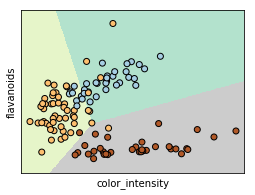

In [101]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)

# Plotando os pontos de treinamento
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(dataset.columns.values[ind1])
plt.ylabel(dataset.columns.values[ind2]) 

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [102]:
#mostrando o y predito
y_pred

array([0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 2, 0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 0, 2, 1, 1,
       1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1])

In [105]:
#y original
y_test

array([0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 2, 0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 0, 2, 1, 1,
       0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1])

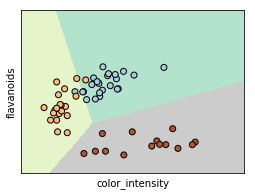

In [103]:
#Plotando conjunto de teste
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Cor em cada divisão
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)

# Plot dos pontos de teste
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(dataset.columns.values[ind1])
plt.ylabel(dataset.columns.values[ind2]) 

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [104]:
#mostrando as estatisticas 
from sklearn.metrics import classification_report 
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.95      0.95      0.95        20
           2       1.00      1.00      1.00        14

    accuracy                           0.97        58
   macro avg       0.97      0.97      0.97        58
weighted avg       0.97      0.97      0.97        58

